In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import matplotlib as mtl

%matplotlib inline
mtl.rcParams['font.sans-serif']=[u'FangSong']
np.set_printoptions(linewidth=120)

## 1.1 Numpy 数组构造

In [31]:
a=np.linspace(0,10,5) #缺省包括终止值
print(a)
a=np.logspace(0,7,8) #缺省包括终止值
print(a)
a=np.arange(0,60,10).reshape((-1,1))+np.arange(0,6,1)
print(a)

[ 0.   2.5  5.   7.5 10. ]
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [32]:
# 使用 frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
s='abcdz'
g=np.fromstring(s,dtype=np.int8)
print(g)

[ 97  98  99 100 122]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


## 1.2 Numpy 数组切片

In [33]:
a = np.arange(10)
print(a)
print(a[3:6])
print(a[:5])
print(a[3:])
print(a[1:9:2])
print(a[::-1])

[0 1 2 3 4 5 6 7 8 9]
[3 4 5]
[0 1 2 3 4]
[3 4 5 6 7 8 9]
[1 3 5 7]
[9 8 7 6 5 4 3 2 1 0]


In [34]:
#整数/布尔数组存取,使用整数序列作为下标获得的数组不和原始数组共享数据空间
a = np.logspace(0, 9, 10, base=2) #[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]
i = np.arange(0, 10, 2) #[0 2 4 6 8]
b=a[i]
print(b)
b[0]=1000
print('a=',a)
print('b=',b)

[  1.   4.  16.  64. 256.]
a= [  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]
b= [1000.    4.   16.   64.  256.]


In [35]:
a = np.random.rand(10)
print(a)
print(a[a>0.5])

[0.97678856 0.72579251 0.74780989 0.70192599 0.22782451 0.30728396 0.11015914 0.79779583 0.08067595 0.18351374]
[0.97678856 0.72579251 0.74780989 0.70192599 0.79779583]


In [36]:
#二维数组的切片
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
print(a)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [37]:
print(a[[0,1,2],[2,3,4]])
print(a[4,[2,3,4]])
print(a[4:,[2,3,4]])

[ 2 13 24]
[42 43 44]
[[42 43 44]
 [52 53 54]]


In [38]:
i = np.array([True, False, True, False, False, True])
print(a[i])
print(a[i,[2,3,4]])
print(a[i,3])#降低维度
print(a[i,3:4])#保持维度

[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 2 23 54]
[ 3 23 53]
[[ 3]
 [23]
 [53]]


## 1.3 Numpy 去重复

In [39]:
a = np.array((1, 2, 3, 4, 5, 5, 7, 3, 2, 2, 8, 8))
print('原始数组：', a)
b=np.unique(a)
print('去重后：', b)

原始数组： [1 2 3 4 5 5 7 3 2 2 8 8]
去重后： [1 2 3 4 5 7 8]


In [40]:
#二维数组的去重
c = np.array(((1, 2), (3, 4), (5, 6), (1, 3), (3, 4), (7, 6)))
print(c)
#narray-->tuple->set->list->narray
np.array(list(set([tuple(t) for t in c])))

[[1 2]
 [3 4]
 [5 6]
 [1 3]
 [3 4]
 [7 6]]


array([[1, 2],
       [7, 6],
       [1, 3],
       [3, 4],
       [5, 6]])

## 1.4 Numpy stack and axis

In [41]:
a = np.arange(1, 10).reshape((3, 3))
b = np.arange(11, 20).reshape((3, 3))
c = np.arange(101, 110).reshape((3, 3))

In [42]:
print('axis=0',np.stack((a,b,c),axis=0))

axis=0 [[[  1   2   3]
  [  4   5   6]
  [  7   8   9]]

 [[ 11  12  13]
  [ 14  15  16]
  [ 17  18  19]]

 [[101 102 103]
  [104 105 106]
  [107 108 109]]]


In [43]:
print('axis=1',np.stack((a,b,c),axis=1))

axis=1 [[[  1   2   3]
  [ 11  12  13]
  [101 102 103]]

 [[  4   5   6]
  [ 14  15  16]
  [104 105 106]]

 [[  7   8   9]
  [ 17  18  19]
  [107 108 109]]]


In [44]:
print('axis=2',np.stack((a,b,c),axis=2))

axis=2 [[[  1  11 101]
  [  2  12 102]
  [  3  13 103]]

 [[  4  14 104]
  [  5  15 105]
  [  6  16 106]]

 [[  7  17 107]
  [  8  18 108]
  [  9  19 109]]]


## 2.1 绘制高斯曲线

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


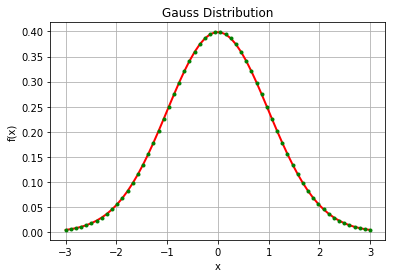

In [45]:
mu,sigma=0,1
x=np.linspace(mu-3*sigma,mu+3*sigma,60)
y=np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
plt.figure(facecolor='w')
plt.plot(x,y,'r-',x,y,'go',linewidth=2,markersize=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(u'Gauss Distribution')
plt.grid()

## 2.2 绘制损失函数

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


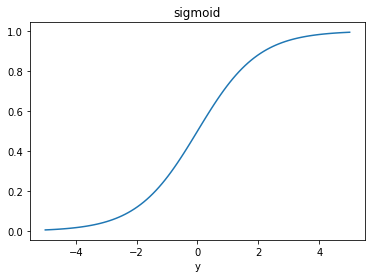

In [46]:
def sigmoid(x):return 1/(1+np.exp(-x))
x=np.linspace(-5,5,100)
y=sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.xlabel('y')
plt.title('sigmoid')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


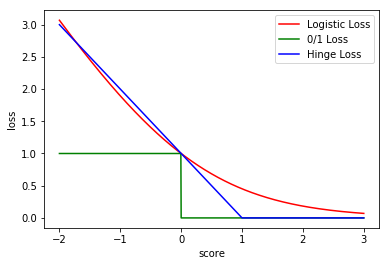

In [47]:
#过（0,1）点
x =np.linspace(start=-2, stop=3, num=1001, dtype=np.float)
y_logistic=-np.log(sigmoid(x))/np.log(2)
plt.plot(x,y_logistic,'r-',label='Logistic Loss')

y_01=x<0
plt.plot(x,y_01,'g-',label='0/1 Loss')

y_hinge=1-x
y_hinge[y_hinge<0]=0
plt.plot(x,y_hinge,'b-',label='Hinge Loss')

plt.xlabel('score')
plt.ylabel('loss')
plt.legend(loc='upper right')

## 2.3 绘制概率分布

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


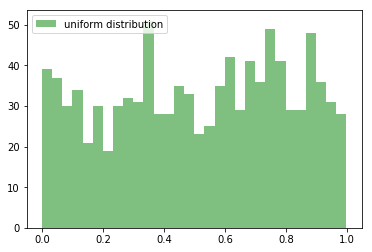

In [48]:
#均匀分布
x=np.random.rand(1000)
plt.hist(x,bins=30,color='g',alpha=0.5,label='uniform distribution')
plt.legend(loc='upper left')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


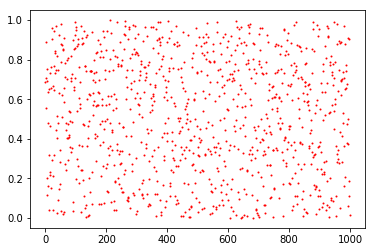

In [49]:
t = np.arange(len(x))
plt.plot(t, x, 'r.',markersize=2) #均匀分布直观理解

## 2.4验证中心极限定理

. 中心定理说：来自相同分布，独立试验之和，服从高斯分布，如果正则话，服从N（0,1）分布

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


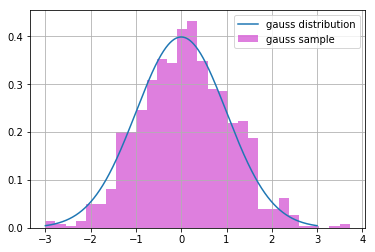

In [50]:
N=1000
#直接取样高斯分布(0,1)
x=np.random.randn(N)
plt.figure(facecolor='w')
plt.hist(x,bins=30,alpha=0.5,color='m',label='gauss sample',normed=True)
#理论值
d_x=np.linspace(-3,3,N)
d_y=np.exp(-d_x**2/(2))/(np.sqrt(2*np.pi))
plt.plot(d_x,d_y,label='gauss distribution')
plt.legend(loc='upper right')
plt.grid()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


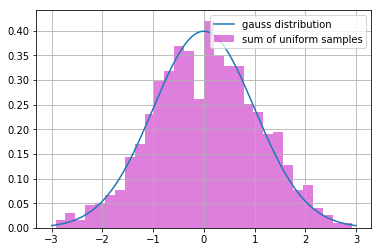

In [51]:
#均匀分布的叠加
t=3000  #X1,X2,..........Xt
sum_x=np.zeros(N)
for i in range(t):
    sum_x+=np.random.rand(N)
#sumx=sum(Xi),mu=0.5*t,std=sqrt(1/12)*sqrt(t)
sum_x=(sum_x-0.5*t)/np.sqrt(t)/np.sqrt(1/12) #减去均值，除以方差，变成 u=0,std=1的 ”数据“

plt.figure(facecolor='w')
plt.hist(sum_x,bins=30,alpha=0.5,color='m',label='sum of uniform samples',normed=True)

#理论值
d_x=np.linspace(-3,3,N)
d_y=np.exp(-d_x**2/(2))/(np.sqrt(2*np.pi))
plt.plot(d_x,d_y,label='gauss distribution')
plt.legend(loc='upper right')
plt.grid()


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


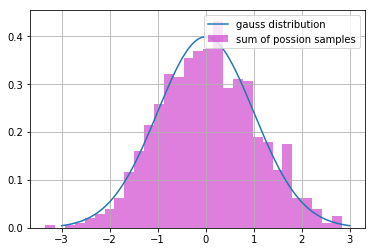

In [52]:
#Possion分布的叠加
labada=5
possion=stats.poisson(labada)
sum_x=np.zeros(N)
for i in range(t):
    sum_x+=possion.rvs(N)
#mu=t*labada std=sqrt(t)*sqrt(labada)
sum_x=(sum_x-t*labada)/np.sqrt(t)/np.sqrt(labada)
plt.hist(sum_x,bins=30,alpha=0.5,color='m',label='sum of possion samples',normed=True)

#理论值
d_x=np.linspace(-3,3,N)
d_y=np.exp(-d_x**2/(2))/(np.sqrt(2*np.pi))
plt.plot(d_x,d_y,label='gauss distribution')
plt.legend(loc='upper right')
plt.grid()

## 2.5 Possion 分布

In [53]:
def possion_function(rate,K):
    factor=np.ones(K+1)
    for k in range(1,K+1):
        factor[k]=factor[k-1]*k
    power=np.power(rate,np.arange(K+1,dtype=np.int))
    
    return power/factor*np.exp(-rate)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


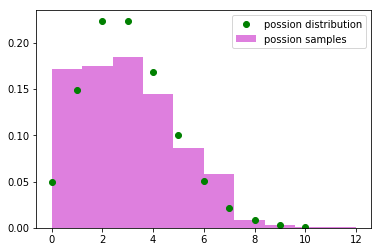

In [54]:
K=10
lam=3
x=np.random.poisson(lam=lam,size=10000)
a=plt.hist(x,bins=K,normed=True,alpha=0.5,color='m',label='possion samples')

#理论值
d_x=np.arange(K+1)
d_y=possion_function(lam,K)
plt.plot(d_x,d_y,'go',label='possion distribution')

plt.legend(loc='upper right')

## 3.1直方图的使用

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


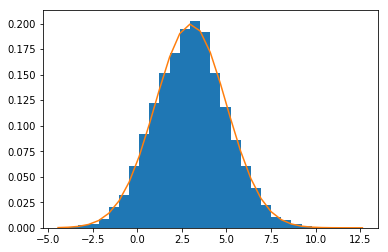

In [55]:
mu,sigma=3,2
data=np.random.randn(10000)*sigma+mu
h=plt.hist(data,bins=30,normed=True)

#理论值
x=h[1] #h[1] 是每个bin的坐标
y=stats.norm.pdf(h[1],loc=mu,scale=sigma)
plt.plot(x,y)

## 4.1 3D图的画法

In [80]:
#mgrid 的用法,x~[-3,3] y~[-5,5]
X,Y=np.mgrid[-3:3:10j,-5:5:10j]
r,c=0,1
print(X[r,c],Y[r,c])
print(X[0,:])

-3.0 -3.888888888888889
[-3. -3. -3. -3. -3. -3. -3. -3. -3. -3.]


In [81]:
#meshgrid 的用法
xrange=np.linspace(-3,3,10)
yrange=np.linspace(-5,5,10)
X,Y=np.meshgrid(xrange,yrange)
print(X[r,c],Y[r,c])
print(X[0,:])

-2.3333333333333335 -5.0
[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333  1.          1.66666667  2.33333333
  3.        ]


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


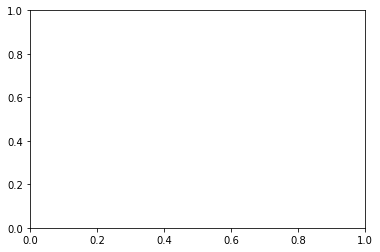

In [87]:
# 画高斯分布
#mgrid 的用法,x~[-3,3] y~[-5,5]
X,Y=np.mgrid[-3:3:10j,-5:5:10j]
Z=np.exp(-(X**2+Y**2)/2)/np.sqrt(2*np.pi)
fig=plt.figure(facecolor='w')
ax=fig.add_subplot(111)
# ax.pl

In [88]:
ax.plot_surface

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'